# Chapter6. Deep Feedforward Networks

### 이론
Deep feedforward networks(feedforward neural networks 또는 multilayer perceptrons(MLPs)라고도 불림, 이하 FFNN)에 대해 알아보겠습니다. FFNN의 목표는 함수 $f^*$로 근사시키는 것입니다. 예를들어, 분류 문제라면 $y =f^*(x)$를 input $x$에 대해 카테고리 $x$로 맵핑시키는 것입니다. FFNN은 mapping $y = f(x;\theta)$을 정의하고 parameters 값인 $\theta$를 최고의 함수가 되게 근사시키는 것입니다. 이러한 모델을 feedforward라고 합니다. 모델의 출력이 자기 자신으로 돌아오지는 않습니다.(FFNN가 피드백 연결을 포함하도록 확장될 때, RNN이라고 합니다.) FFNN은 이후 나오는 모델들(CNN, RNN 등)을 이해하기 위한 기초로서 매우 중요합니다. FFNN은 일반적으로 다양한 함수들을 함께 구성하기 떄문에, 네트워크라고 불립니다. 모델은 함수들이 어떻게 함께 구성되는지를 설명하는 방향성 비순환 그래프(directed acyclic graph)와 연관됩니다. 예를들어서 세개의 함수를 연쇄적으로 연결하여 $f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$를 형성할 수 있습니다. 각 함수는 네트워크의 n번쨰 층이며, 연쇄(chain)의 전체 길이는 모델의 깊이를 나타냅니다. 해당 용어에서 "딥러닝(Deep learning)"이라는 이름이 유래합니다. FFNN의 마지막 층을 출력층이라고 합니다. NN을 훈련시키는 동아, 우리는 $f(x)를 f^*(x)$로 끌고가야 합니다. 출력층은 레이블 y에 가까운 값을 생성해야합니다. 하지만 다른 층들의 행동은 훈련 데이터에 의해 직접적으로 지정되지는 않습니다. 대신, 학습 알고리즘은 이러한 층(Hidden Layer라고합니다.)들을 사용하여 $f^*$의 근사치를 최적으로 구현하는 방법을 결정해야합니다.

### 구현
tf.keras로 모델을 작성하는 세가지 방법 : 순차적(Sequential)API, 함수적(Functional)API, 모델 서브 클래싱(Model Subclassing)

나머지는 뒤에서 설명하도록 하고, 우선 Sequential()을 알아보도록 합시다. Sequential()모델은 신경망 계층의 선형 파이프라인(스택)입니다. 다음 코드는 784개의 입력변수(특징)를 취하는 10개의 인공 뉴런을 가진 단일 계층을 정의합니다. 망이 "밀집(Dense)"되었다는 것은 각 계층의 뉴런이 이전 계층과 다음 계층에 있는 모든 뉴런과 완전연결(Fully Connected)되어 있음을 의미합니다.

In [13]:
import tensorflow as tf
from tensorflow import keras
NB_CLASSES = 10
RESHAPED = 784
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape =(RESHAPED,), kernel_initializer = 'zeros',
                             name = 'dense_layer', activation = 'softmax'))

각 뉴런은 kernel_initializaer 매개변수를 통해 특정 가중치로 초기화할 수 있습니다. 몇가지 옵션이 있는데
1) random_uniform: 가중치는 -0.05 ~ 0.05 사이에서 균등하게 임의 분포합니다.
2) random_normal: 가중치는 가우스 분포에 따라 평균이 0이고 작은 표준편차 0.05로 초기화됩니다.
3) zero: 모든 가중치는 0으로 초기화됩니다.

initializers에 대한 전체 목록은 다음 링크를 참고하세요.[Tensorflow keras initializers](https://www.tensorflow.org/api_docs/python/tf/keras/initializers)

앞에서는 여러 개의 밀집(Dense)계층이 있는 첫 번째 신경망 예제를 소개했습니다. "퍼셉트론(Perceptron)"은 단일 선형 계층에 붙혀진 이름이며, 그 결과 여러 계층이 있는 경우에는 다층 퍼셉트론(MLP, Multi-Layer Perceptron)이라고 부릅니다. MLP는 여러 개의 단일 계층을 차례로 쌓으면 얻을 수 있습니다.

activation function $f(x) = 
\begin{cases} 
1 & \text{if } wx+b > 0 \\
0 & \text{otherwise}
\end{cases}$
위와 같은 activation function은 0또는 1의 output을 가집니다. 우리는 모델이 점진적으로 학습하기를 원하는데, 이런 output은 "조금씩"의 작동을 보이지 않으므로 적절하지 않습니다. '변하는 양'을 모델링 해야하므로, 미분이 가능한 연속함수가 필요합니다. 해당 문서는 실습예제에 초점이 맞춰져있으므로 Sigmoid, ELU, LeakyReLU 그리고 ReLU같은 Activation Function은 설명을 생략합니다.
Activation Functions에 대한 전체 목록은 다음 링크를 참고하세요. [Tensorflow keras activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

## 6.1 Example: Learning XOR, MNIST

### 6.1.1 XOR

XOR 연산의 기본 개념은 다음과 같습니다.

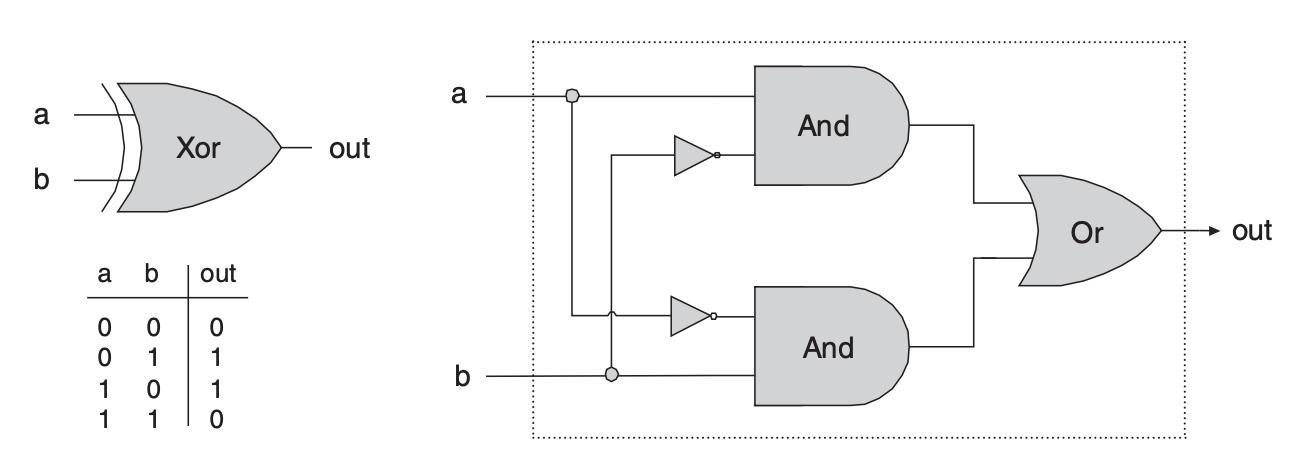
<center><small>Reference : https://roseline.oopy.io/dev/logic-gate-xor</small></center>


### 6.1.2 MNIST

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# 신경망과 훈련 매개변수
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 0
NB_CLASSES = 10 # 출력 개수
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # 검증을 위해 남겨둔 훈련 데이터

# MNIST 데이터셋 로드
# 검증
# 훈련과 테스트 데이터를 각각 60,000과 10,000개로 나눔
# 레이블에 대한 원-핫 인코딩은 자동으로 적용
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train은 60000개 행으로 28x28 값을 가진다; 이를 60000x784 형태로 변환
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 입력을 [0,1] 사이로 정규화
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# 레이블을 원-핫 인코딩
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [15]:
# 모델 구축
model = tf.keras.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer',
                             activation = 'softmax'))

In [16]:
# 모델 컴파일
model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs = EPOCHS,
          verbose = VERBOSE, validation_split = VALIDATION_SPLIT)

In [18]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)             │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [19]:
# 모델 평가
test_los, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy: ", test_acc)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9688 - loss: 0.2501

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9088 - loss: 0.3160
Test Accuracy:  0.9214000105857849


In [20]:
# 성능 개선 - 단순 신경망을 은닉층으로 개선
model = tf.keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer_1', activation = 'relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer_2', activation = 'relu'))
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer_3', activation = 'softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_3 (Dense)           │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 성능 개선 - 드롭아웃으로 단순망 개선
DROPOUT = 0.3

model = tf.keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer_1', activation = 'relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer_2', activation = 'relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape=(RESHAPED,),
                             name = 'dense_layer_3', activation = 'softmax'))

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_3 (Dense)           │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 성능 개선 - 모델 컴파일 종류
# 모델 컴파일
model.compile(optimizer='SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.compile(optimizer='ADAM',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Reference
1) Deep Learning with Tensorflow and Keras 3E(Amita Kapoor, Antonio Gulli, Sujit Pal)
2) Deep Learning(Ian Goodfellow, Yoshua Dengio, Aaron Courvile)